In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv(r'D:\TITANIC SURVIVAL PREDICTION\tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Exploratory Data Analysis(EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.shape

(418, 12)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

fill null with mean

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [10]:
embarked = df['Embarked'].unique()
for embarkeds in embarked:
    print('-->>' , embarkeds)

-->> Q
-->> S
-->> C


to convert embarked and sex from object to int

In [11]:
df['Embarked'] =df['Embarked'].map({'Q':0 , 'S':1 , 'C':2}).astype(int)
df['Sex'] =df['Sex'].map({'female':1 , 'male':0}).astype(int)

In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

In [15]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)


drop unnecessary columns

In [16]:
data = df.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


# Data Visualization


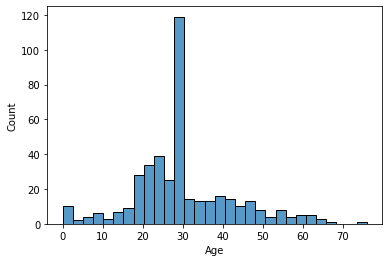

In [18]:
sns.histplot(data=df,x=df['Age'],kde=False,bins=30);


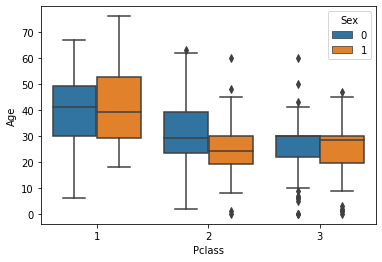

In [19]:
sns.boxplot(data=df,x='Pclass',y='Age',hue='Sex');


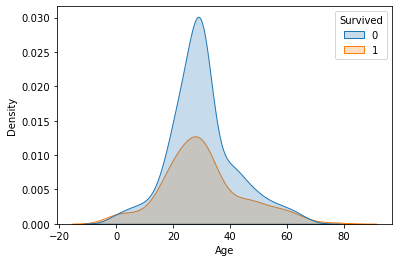

In [20]:
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True);


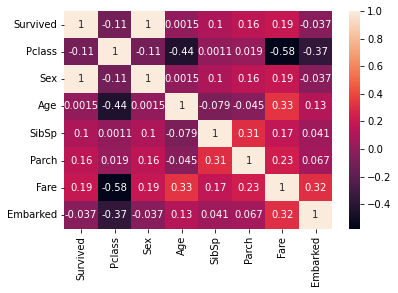

In [21]:
sns.heatmap(df.corr(), annot=True)

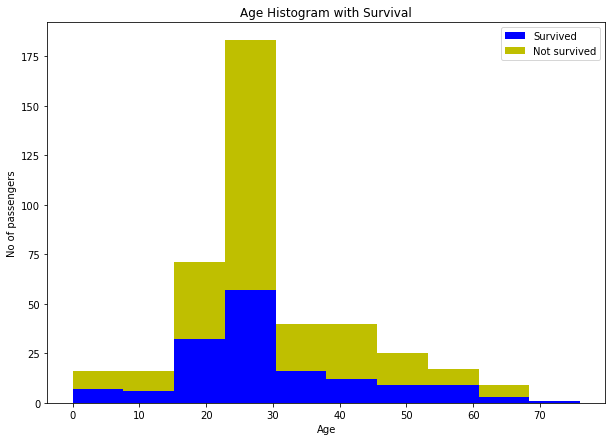

In [27]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['b','y'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

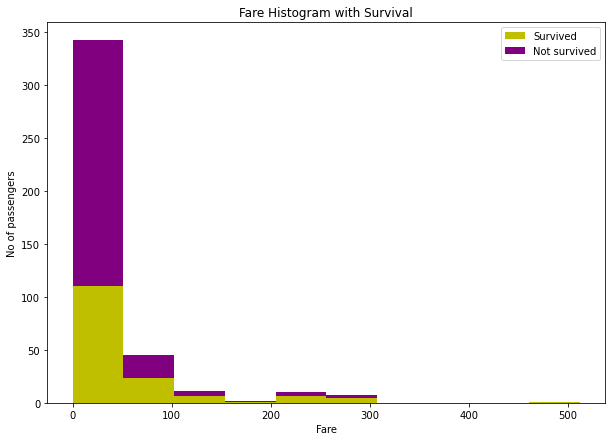

In [30]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, color = ['y','purple'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

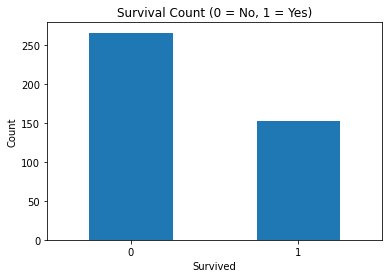

In [32]:
survival_counts = df['Survived'].value_counts()
survival_counts.plot(kind='bar', rot=0)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

# Data spliting

In [35]:
Train = df.drop(['Survived'], axis=1)
Test = df.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 10)

# model building

In [38]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 95.24%
